In [1]:
import sys
sys.path.append("../../src")
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch.nn.functional as F
import argparse
import matplotlib

from tqdm import tqdm
import glob
from PIL import Image
import os
from datetime import datetime
import time
import math

from ANN import *
from visualization import *

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [3]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), 
                                            torchvision.transforms.Normalize(mean=(0.4914, 0.4822, 0.4465), 
                                            std=(3*0.2023, 3*0.1994, 3*0.2010))])

cifar_dset_train = torchvision.datasets.CIFAR10('../../data', train=True, transform=transform, target_transform=None, download=True)
train_loader = torch.utils.data.DataLoader(cifar_dset_train, batch_size=20, shuffle=True, num_workers=0)

cifar_dset_test = torchvision.datasets.CIFAR10('../../data', train=False, transform=transform, target_transform=None, download=True)
test_loader = torch.utils.data.DataLoader(cifar_dset_test, batch_size=20, shuffle=False, num_workers=0)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
device = "cuda"
criterion = torch.nn.MSELoss().to(device)
# criterion = torch.nn.CrossEntropyLoss()
activation = F.relu
architecture = [int(32*32*3), 1000, 500, 10]
model = MLP(architecture, activation = activation, final_layer_activation = False).to(device)

In [5]:
evaluateClassification(model, train_loader, "cuda")

Accuracy :	 0.08484


0.08484

In [6]:
# # specify optimizer (stochastic gradient descent) and learning rate
# optimizer = torch.optim.SGD(model.parameters(),lr = 0.001, momentum = 0.0)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
trn_acc_list = []
tst_acc_list = []

n_epochs = 20
for epoch_ in range(n_epochs):
    model.train()
    for idx, (x, y) in tqdm(enumerate(train_loader)):
        x, y = x.to(device), y.to(device)
        y_one_hot = F.one_hot(y, num_classes=model.nc)
        optimizer.zero_grad()
        y_hat = model(x)
#         loss = criterion(y_hat,y) # Use this if criterion = torch.nn.CrossEntropyLoss()
        loss = criterion(y_hat,y_one_hot.to(torch.float32)) # Use this if criterion = torch.nn.MSELoss().to(device)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
    trn_acc = evaluateClassification(model, train_loader, device, False)
    tst_acc = evaluateClassification(model, test_loader, device, False)
    trn_acc_list.append(trn_acc)
    tst_acc_list.append(tst_acc)
    
    print("Epoch : {}, Train Accuracy : {}, Test Accuracy : {}".format(epoch_+1, trn_acc, tst_acc))

2500it [00:12, 201.76it/s]
19it [00:00, 189.75it/s]

Epoch : 1, Train Accuracy : 0.5094, Test Accuracy : 0.4806


2500it [00:12, 202.00it/s]
20it [00:00, 192.47it/s]

Epoch : 2, Train Accuracy : 0.56352, Test Accuracy : 0.5142


2500it [00:12, 201.69it/s]
20it [00:00, 191.61it/s]

Epoch : 3, Train Accuracy : 0.60534, Test Accuracy : 0.5279


2500it [00:12, 201.74it/s]
20it [00:00, 190.41it/s]

Epoch : 4, Train Accuracy : 0.64416, Test Accuracy : 0.5448


2500it [00:12, 197.88it/s]
12it [00:00, 111.69it/s]

Epoch : 5, Train Accuracy : 0.68448, Test Accuracy : 0.549


2500it [00:25, 97.10it/s] 
10it [00:00, 93.33it/s]

Epoch : 6, Train Accuracy : 0.71624, Test Accuracy : 0.555


2500it [00:26, 96.09it/s] 
10it [00:00, 96.87it/s]

Epoch : 7, Train Accuracy : 0.74562, Test Accuracy : 0.5647


2500it [00:25, 97.56it/s] 
10it [00:00, 91.05it/s]

Epoch : 8, Train Accuracy : 0.76936, Test Accuracy : 0.5652


2500it [00:25, 96.30it/s] 
10it [00:00, 91.96it/s]

Epoch : 9, Train Accuracy : 0.80836, Test Accuracy : 0.5643


2500it [00:24, 100.02it/s]
10it [00:00, 99.56it/s]

Epoch : 10, Train Accuracy : 0.8334, Test Accuracy : 0.5684


2500it [00:24, 103.23it/s]
10it [00:00, 96.29it/s]

Epoch : 11, Train Accuracy : 0.85888, Test Accuracy : 0.579


2500it [00:24, 104.07it/s]
11it [00:00, 102.12it/s]

Epoch : 12, Train Accuracy : 0.8783, Test Accuracy : 0.5689


2500it [00:24, 103.69it/s]
11it [00:00, 100.25it/s]

Epoch : 13, Train Accuracy : 0.89406, Test Accuracy : 0.5685


2500it [00:24, 103.14it/s]
10it [00:00, 98.46it/s]

Epoch : 14, Train Accuracy : 0.90376, Test Accuracy : 0.569


2500it [00:23, 105.16it/s]
10it [00:00, 94.42it/s]

Epoch : 15, Train Accuracy : 0.9197, Test Accuracy : 0.5671


2500it [00:24, 103.95it/s]
10it [00:00, 96.12it/s]

Epoch : 16, Train Accuracy : 0.9311, Test Accuracy : 0.5609


2500it [00:24, 102.21it/s]
11it [00:00, 98.91it/s]

Epoch : 17, Train Accuracy : 0.94088, Test Accuracy : 0.5661


2500it [00:24, 101.95it/s]
10it [00:00, 98.67it/s]

Epoch : 18, Train Accuracy : 0.94938, Test Accuracy : 0.5731


2500it [00:24, 101.84it/s]
11it [00:00, 101.34it/s]

Epoch : 19, Train Accuracy : 0.95512, Test Accuracy : 0.5648


2500it [00:24, 102.72it/s]


Epoch : 20, Train Accuracy : 0.96124, Test Accuracy : 0.5689


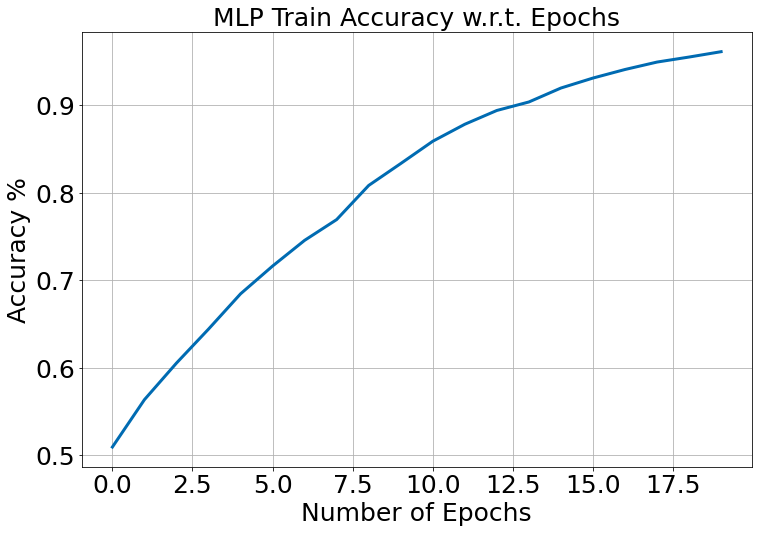

In [7]:
plot_convergence_plot(trn_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'MLP Train Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)

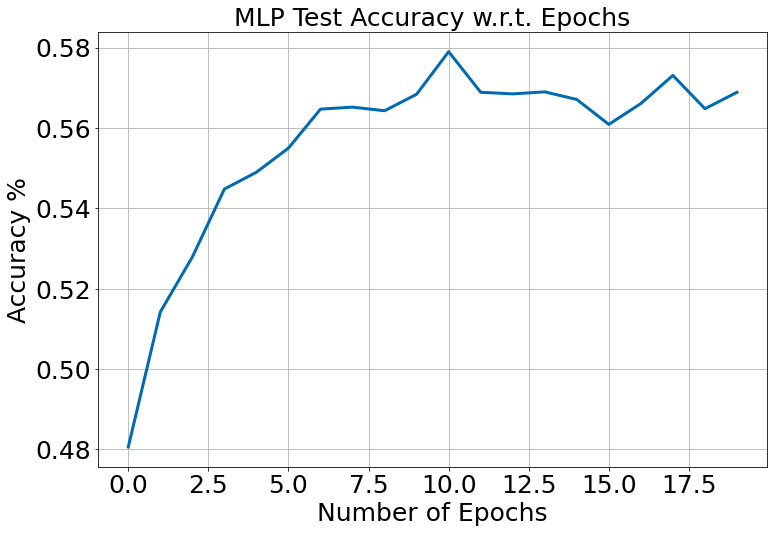

In [8]:
plot_convergence_plot(tst_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'MLP Test Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)